In [1]:
"""分類指標 僅適用二元分法"""

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

# 忽略警告用的
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# 解決字體問題
plt.rcParams["font.family"] = ["Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False


def evaluate_model_multi_class(y_test, y_pred):
    # 從y_test自動讀取類別數
    num_classes = len(np.unique(y_test))

    # 計算和顯示混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=range(num_classes), columns=range(num_classes))
    # 轉換為比例
    cm_ratio = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 7))
    # 使用藍色的色調 'Blues'
    sn.heatmap(cm_ratio, annot=True, fmt=".0%", cmap="Blues")
    plt.title("Confusion matrix (混淆矩陣)\n", y=1.1)
    plt.ylabel("Actual label (實際標籤)\n")
    plt.xlabel("Predicted label (預測標籤)\n")
    plt.show()

    # 計算和顯示每個類的Accuracy、Precision、Recall和F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    print(f"Accuracy (準確率): {accuracy:.2%}")
    print(f"Precision (精確率) - Macro Average: {precision:.2%}")
    print(f"Recall (召回率) - Macro Average: {recall:.2%}")
    print(f"F1 Score (F1分數) - Macro Average: {f1:.2%}")


# 使用範例
# y_pred = model.predict(X_test)
# evaluate_model_multi_class(y_test, y_pred)

In [2]:
"""檢視空值及零值"""

import pandas as pd


def analyze_nan_and_zero_values(
    data, threshold, sort_column="零值+NAN佔比 (%)", ascending=False
):
    """
    檢查0值和 nan 的數量
    threshold 為 百分比，例threshold=20，會回傳 零值+NAN佔比 (%) 大於20% 的
    當 threshold = 0 會回傳全部
    """

    # 如果輸入是文件路徑，讀取CSV文件並轉換成Pandas DataFrame

    if isinstance(data, str):

        file_source_pd = pd.read_csv(data)

    # 如果輸入是Pandas DataFrame，直接使用它

    elif isinstance(data, pd.DataFrame):

        file_source_pd = data

    else:

        raise ValueError(
            "Invalid input type. Input must be either file path or Pandas DataFrame."
        )

    # 計算這個範圍內每一欄的空白值(NaN)數量

    nan_values_per_column_in_range = file_source_pd.isnull().sum(axis=0)

    # 計算每個欄位的總數據量

    total_data_per_column = len(file_source_pd)

    # 計算每個欄位的空白值(NaN)佔比

    nan_percentage_per_column = (
        nan_values_per_column_in_range / total_data_per_column
    ) * 100

    # 計算這個範圍內每一欄的零值數量

    zero_values_per_column_in_range = (file_source_pd == 0).sum(axis=0)

    # 計算每個欄位的零值佔比

    zero_percentage_per_column = (
        zero_values_per_column_in_range / total_data_per_column
    ) * 100

    # 計算每個欄位的零值和NaN值的總數

    total_zero_and_nan_per_column = (
        zero_values_per_column_in_range + nan_values_per_column_in_range
    )

    # 計算每個欄位的零值和NaN值總數的佔比

    total_zero_and_nan_percentage_per_column = (
        total_zero_and_nan_per_column / total_data_per_column
    ) * 100

    # 將結果轉換為 DataFrame

    values_df = pd.DataFrame(
        {
            "欄位名稱": nan_values_per_column_in_range.index,
            "零值+NAN佔比 (%)": total_zero_and_nan_percentage_per_column.values.round(
                2
            ),
            "空白值(NaN)數量": nan_values_per_column_in_range.values,
            "空白值(NaN)佔比 (%)": nan_percentage_per_column.values.round(2),
            "零值數量": zero_values_per_column_in_range.values,
            "零值佔比 (%)": zero_percentage_per_column.values.round(2),
        }
    )

    # 將 DataFrame 存儲到 CSV 檔案中
    values_df.to_csv("零值與空白值統計.csv", index=False, encoding="utf-8-sig")

    # 如果 threshold 等於 0，則返回所有欄位
    if threshold == 0:
        return values_df

    # 篩選出 '零值+NAN佔比 (%)' 大於指定閾值的欄位

    filtered_values_df = values_df[values_df["零值+NAN佔比 (%)"] > threshold]

    # 根據指定的列進行排序

    sorted_values_df = filtered_values_df.sort_values(
        by=sort_column, ascending=ascending
    )

    return sorted_values_df


# 測試


# result_df = analyze_nan_and_zero_values(clean_data, threshold=0, sort_column='欄位名稱', ascending=False)


# print(result_df)

In [3]:
import pandas as pd

file_path = r"..\飲料店總表0307final01_補上人氣_補值_hg.xlsx"

# dataset = pd.read_csv(file_path, sep=",", encoding="UTF-8")

dataset = pd.read_excel(file_path)
# print(dataset.info())
# dataset

In [4]:
"""selected_data
"""

selected_data = dataset[
    [
        "star",
        "school_counts",
        "drink_counts",
        "train_counts",
        "youbike_counts",
        "bus_counts",
        "park_counts",
        "night_market_counts",
        "sports_facilities_counts",
        "mrt_counts",
        "movie_theater_counts",
        "hospital_counts",
        "salary_income_median",
        "people_flow_mean",
        "knock_down_price_mean",
        "weekend_open",
        "road_area_ratio",
        "age",
        "weekday_working_hours_average",
        # "comment",
        # "people_flow_average",
        "popularity",
        # "KMEANS",
    ]
]

# selected_data

In [5]:
"""因為數值分布差很多 刪掉極端"""

# 直接在原始 DataFrame 中刪除 'popularity' 小於 8726.779 的行
selected_data = selected_data[selected_data["popularity"] <= 2213.641425]
# selected_data = selected_data[selected_data['popularity'] != 0]

In [6]:
import numpy as np

# 使用 pd.cut 根據數值大小劃分 'popularity' 欄位
# 計算數據範圍
min_val = selected_data["popularity"].min()
max_val = selected_data["popularity"].max()

# 創建五個分組的邊界值
bins = np.linspace(min_val, max_val, 6)

# 使用 pd.cut 來分組
selected_data["popularity_category"] = pd.cut(
    selected_data["popularity"],
    bins=bins,
    include_lowest=True,  # 確保包括最低值
    labels=[0, 1, 2, 3, 4],  # 這是每個範圍的標籤
)

# 打印新的分類結果和每類的數量
# print(selected_data['popularity_category'].value_counts().sort_index())

# 建立統計信息表格
summary_df = (
    selected_data.groupby("popularity_category")["popularity"]
    .agg(最小值="min", 最大值="max", 數量="size")
    .reset_index()
)
print(summary_df)

  popularity_category          最小值          最大值    數量
0                   0     0.000000   441.227668  3180
1                   1   441.257427   882.514854   635
2                   2   882.637890  1320.782089   321
3                   3  1325.771070  1758.006505   178
4                   4  1767.739056  2206.287135   112


C:\Users\student\AppData\Local\Temp\ipykernel_15664\1711294.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = selected_data.groupby('popularity_category')['popularity'].agg(


In [7]:
"""轉位數"""

selected_data["age"] = selected_data["age"].round(2)
selected_data["road_area_ratio"] = selected_data["road_area_ratio"].round(3)

# dataset['brand'] = dataset['brand'].fillna(-1)
# dataset['Saturday_open_hours'] = dataset['Saturday_open_hours'].fillna(-1)
# dataset['Sunday_open_hours'] = dataset['Sunday_open_hours'].fillna(-1)

# X = dataset.drop(
#     ['comment','star','people_flow_average','popularity',"KMEANS"], axis=1
# )
y = selected_data["popularity_category"]
X = selected_data.drop(["popularity", "popularity_category"], axis=1)

# y = dataset["KMEANS"]
y = y.to_frame()
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [9]:
analyze_nan_and_zero_values(X, 0, sort_column="零值+NAN佔比 (%)", ascending=False)
# analyze_nan_and_zero_values(y, 0, sort_column="零值+NAN佔比 (%)", ascending=False)

,欄位名稱,零值+NAN佔比 (%),空白值(NaN)數量,空白值(NaN)佔比 (%),零值數量,零值佔比 (%)
0,star,4.86,0,0.0,215,4.86
1,school_counts,2.62,0,0.0,116,2.62
2,drink_counts,0.00,0,0.0,0,0.00
3,train_counts,84.39,0,0.0,3735,84.39
4,youbike_counts,11.00,0,0.0,487,11.00
5,bus_counts,1.38,0,0.0,61,1.38
6,park_counts,3.57,0,0.0,158,3.57
7,night_market_counts,54.63,0,0.0,2418,54.63
8,sports_facilities_counts,11.00,0,0.0,487,11.00
9,mrt_counts,31.70,0,0.0,1403,31.70


In [10]:
# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

In [11]:
import matplotlib.pyplot as plt

# 解決字體問題
plt.rcParams["font.family"] = ["Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False

$ MLP

0.5911144578313253
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       925
           1       0.00      0.00      0.00       213
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        61
           4       0.03      0.32      0.06        28

    accuracy                           0.59      1328
   macro avg       0.16      0.23      0.17      1328
weighted avg       0.52      0.59      0.55      1328



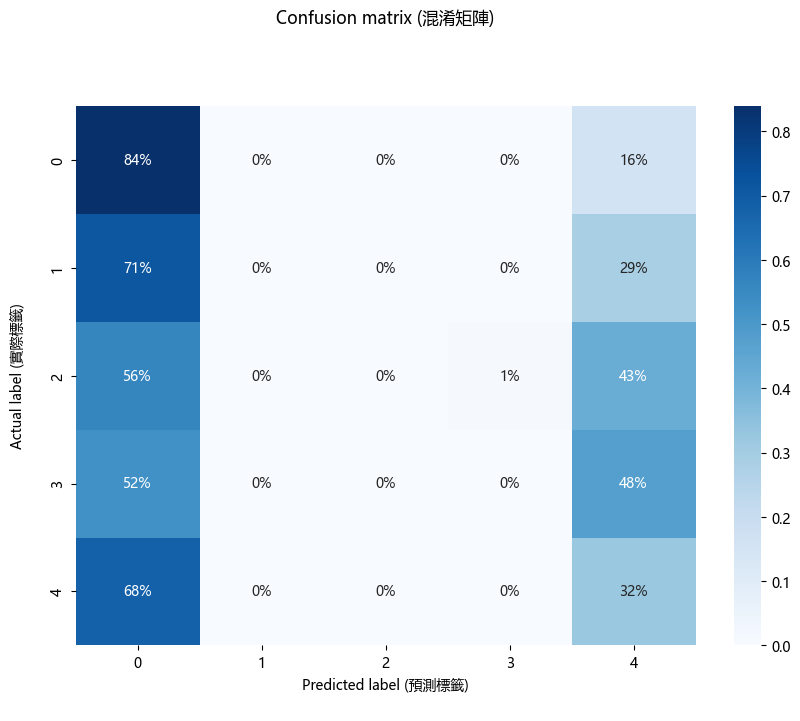

Accuracy (準確率): 59.11%
Precision (精確率) - Macro Average: 15.61%
Recall (召回率) - Macro Average: 23.21%
F1 Score (F1分數) - Macro Average: 16.97%


In [12]:
# 忽略警告用的
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# 導入並訓練MLP模型
from sklearn.neural_network import MLPClassifier

# 定義MLP分類器，可以調整參數如hidden_layer_sizes, activation等以達到最佳效能

# 先初始化一個空的MLP模型
mlp_model = MLPClassifier()

# 現在可以設置模型參數
mlp_model.set_params(
    hidden_layer_sizes=(100,), max_iter=1000, activation="relu", random_state=42
)

# 訓練MLP模型
mlp_model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred_mlp = mlp_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_report_mlp = classification_report(y_test, y_pred_mlp)

# 輸出結果
print(accuracy_mlp)
print(classification_report_mlp)

# 輸出所有指標
y_test_mlp = mlp_model.predict(X_test)
evaluate_model_multi_class(y_test, y_test_mlp)

## 調參 優化後模型驗證部分

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
124 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

Best parameters found:
 {'activation': 'tanh', 'alpha': 1e-06, 'hidden_layer_sizes': (25,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.6965361445783133
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       925
           1       0.00      0.00      0.00       213
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00        28

    accuracy                           0.70      1328
   macro avg       0.14      0.20      0.16      1328
weighted avg       0.49      0.70      0.57      1328



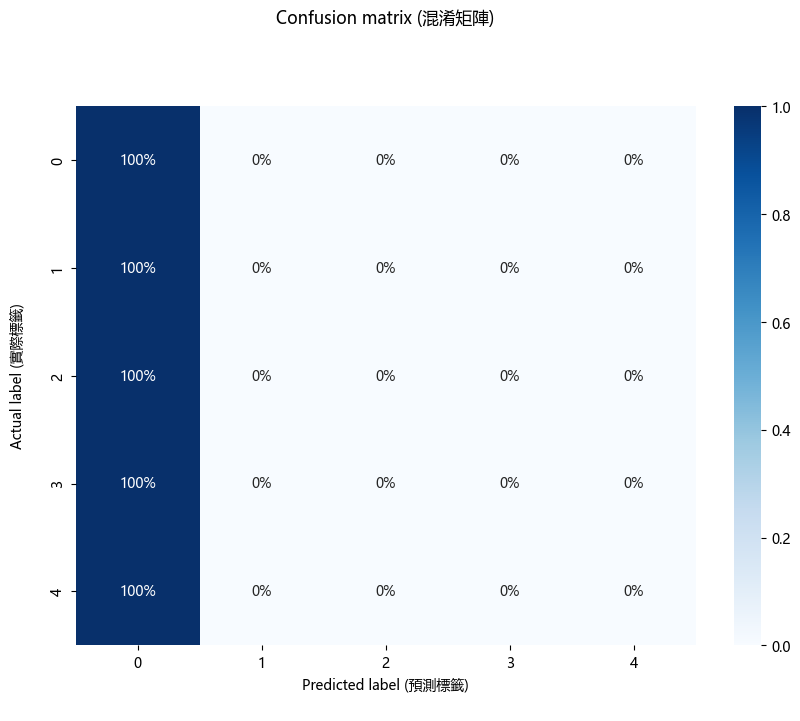

Accuracy (準確率): 69.65%
Precision (精確率) - Macro Average: 13.93%
Recall (召回率) - Macro Average: 20.00%
F1 Score (F1分數) - Macro Average: 16.42%


['best_mlp_model.joblib']

In [13]:
# 忽略警告用的
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# 導入必要的庫
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# 設定想要嘗試的參數範圍
parameter_space = {
    "hidden_layer_sizes": [
        (25,),
        (50,),
        (100,),
        (50, 50),
        (100, 50),
    ],  # 嘗試不同的隱藏層配置
    "activation": ["tanh", "relu", "sigmoid"],  # 嘗試不同的激活函數
    "solver": ["sgd", "adam"],  # 嘗試不同的優化算法
    "alpha": [0.000001, 0.0001, 0.05],  # 嘗試不同的正則化項
    "learning_rate": ["constant", "adaptive"],  # 嘗試不同的學習率
}

# 定義MLP分類器
mlp = MLPClassifier(max_iter=1000, random_state=42)

# 定義GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)

# 訓練模型
clf.fit(X_train, y_train)

# 輸出最佳參數組合
print("Best parameters found:\n", clf.best_params_)

# 使用最佳參數預測測試集
y_pred_mlp_best = clf.predict(X_test)

# 從sklearn.metrics導入性能評估函數
from sklearn.metrics import accuracy_score, classification_report

# 計算準確率和分類報告
accuracy_mlp_best = accuracy_score(y_test, y_pred_mlp_best)
classification_report_mlp_best = classification_report(y_test, y_pred_mlp_best)

# 輸出結果
print(accuracy_mlp_best)
print(classification_report_mlp_best)

# 輸出所有指標
evaluate_model_multi_class(y_test, y_pred_mlp_best)


# 使用最佳參數創建並訓練模型
best_mlp = MLPClassifier(max_iter=1000, random_state=42, **clf.best_params_)
best_mlp.fit(X_train, y_train)

"""輸出模型"""
# 匯出模型
from joblib import dump

dump(best_mlp, "best_mlp_model.joblib")

## 補充：梯度下降

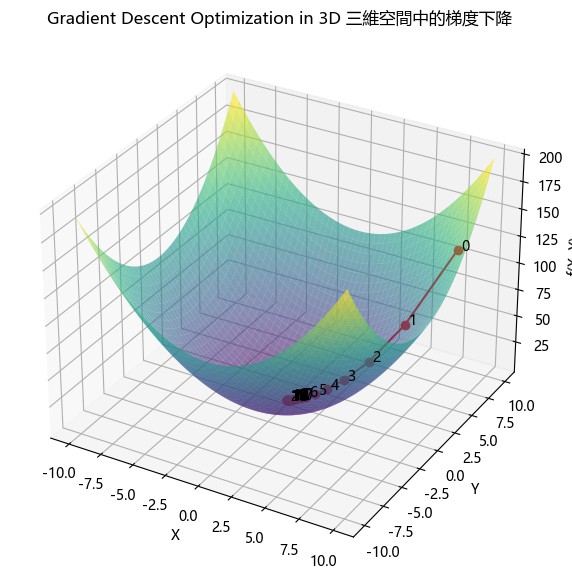

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 定義函數和梯度
def f(x, y):
    return x**2 + y**2


def df(x, y):
    return 2 * x, 2 * y


# 梯度下降函數
def gradient_descent(starting_point, iterations, learning_rate):
    x, y = starting_point
    history = [(x, y)]
    for _ in range(iterations):
        grad_x, grad_y = df(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        history.append((x, y))
    return history


# 初始化參數
starting_point = (9, 7)
iterations = 20
learning_rate = 0.15

# 執行梯度下降
history = gradient_descent(starting_point, iterations, learning_rate)

# 繪製三維圖
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = f(x_vals, y_vals)
ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.6, cmap="viridis")

# 繪製梯度下降的路徑
x_history, y_history = zip(*history)
z_history = [f(x, y) for x, y in zip(x_history, y_history)]
ax.plot(x_history, y_history, z_history, color="r", marker="o")

# 標記順序
for i, (x, y, z) in enumerate(zip(x_history, y_history, z_history)):
    ax.text(x, y, z, f" {i}", color="black")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(X, Y)")
plt.title("Gradient Descent Optimization in 3D 三維空間中的梯度下降")
plt.show()